In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# read data from file
df = pd.read_csv('GTD.csv', encoding = 'utf8',index_col=0)
df.head(10)

dates    countries                                 groups fatalities  \
0  2018-12-31  Afghanistan                                Taliban          1   
1  2018-12-31  Afghanistan                                Taliban    Unknown   
2  2018-12-31  Afghanistan                                Unknown          1   
3  2018-12-31        Libya                                Unknown          0   
4  2018-12-31     Pakistan  Khorasan Chapter of the Islamic State          3   
5  2018-12-31     Pakistan                                Unknown          1   
6  2018-12-31        Yemen                                Unknown          0   
7  2018-12-31        India                                Unknown          0   
8  2018-12-31  Afghanistan                                Taliban         10   
9  2018-12-31  Afghanistan                                Unknown          2   

   injured          target_types                     regions  \
0        3                Police                  South Asia   
1  Unknown              Military                  South Asia   
2        0  Government (General)                  South Asia   
3        0             Utilities  Middle East & North Africa   
4        0               Unknown                  South Asia   
5        0              Business                  South Asia   
6        5                Police  Middle East & North Africa   
7        0              Military                  South Asia   
8       10             Utilities                  South Asia   
9        5              Business                  South Asia   

                     attack_types               weapon_types  
0                         Unknown                    Unknown  
1  Facility/Infrastructure Attack                    Unknown  
2                   Armed Assault                   Firearms  
3  Facility/Infrastructure Attack                   Firearms  
4               Bombing/Explosion  Explosives/Bombs/Dynamite  
5                   Armed Assault                   Firearms  
6                   Assassination                   Firearms  
7                   Armed Assault                   Firearms  
8                   Armed Assault                   Firearms  
9               Bombing/Explosion  Explosives/Bombs/Dynamite

# date clean process

In [4]:
#clean the dataset
#remove some useless columns
to_drop = ['groups',
           'regions']
df.drop(columns=to_drop, inplace=True) 

In [5]:
#find the date of 911 event
df.loc[118361]

dates                          2001-09-11
countries                         Armenia
fatalities                              1
injured                                 0
target_types         Government (General)
attack_types                Assassination
weapon_types    Explosives/Bombs/Dynamite
Name: 118361, dtype: object

In [6]:
#select data from 2001-09-11 to 2018-12-31
df.drop(df.index[118361:], inplace=True)
# delete all the Unknown values
df=df[~df['fatalities'].isin(['Unknown'])]
df=df[~df['injured'].isin(['Unknown'])]
df=df[~df['target_types'].isin(['Unknown'])]
df=df[~df['attack_types'].isin(['Unknown'])]
df=df[~df['weapon_types'].isin(['Unknown'])]
#only select the value of year
df['dates'] = df['dates'].str.slice(0,4,1)
#rename the dates to years
df.rename(columns={'dates':'year'},inplace=True)
#change str to number
df['fatalities'] = pd.to_numeric(df['fatalities'])
df['injured'] = pd.to_numeric(df['injured'])

df

year                 countries  fatalities  injured  \
2       2018               Afghanistan           1        0   
3       2018                     Libya           0        0   
5       2018                  Pakistan           1        0   
6       2018                     Yemen           0        5   
7       2018                     India           0        0   
...      ...                       ...         ...      ...   
118356  2001                     India           1        4   
118357  2001                  Colombia           0        0   
118358  2001                    Russia           0        5   
118359  2001               Philippines           3        6   
118360  2001  West Bank and Gaza Strip           0        1   

                       target_types                    attack_types  \
2              Government (General)                   Armed Assault   
3                         Utilities  Facility/Infrastructure Attack   
5                          Business                   Armed Assault   
6                            Police                   Assassination   
7                          Military                   Armed Assault   
...                             ...                             ...   
118356                     Military               Bombing/Explosion   
118357  Private Citizens & Property               Bombing/Explosion   
118358               Police,NGO,NGO               Bombing/Explosion   
118359                     Military                   Armed Assault   
118360  Private Citizens & Property                   Armed Assault   

                     weapon_types  
2                        Firearms  
3                        Firearms  
5                        Firearms  
6                        Firearms  
7                        Firearms  
...                           ...  
118356  Explosives/Bombs/Dynamite  
118357  Explosives/Bombs/Dynamite  
118358  Explosives/Bombs/Dynamite  
118359                   Firearms  
118360                   Firearms  

[96437 rows x 7 columns]

# Stat by year

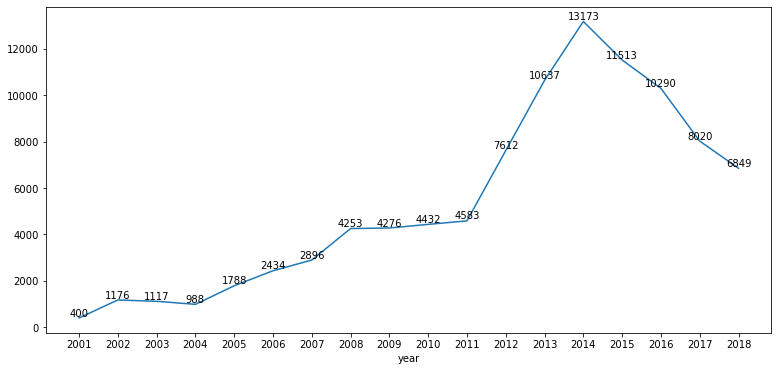

In [7]:
# count the times of Terrorism by year and draw a figure
year_df = df.groupby(by = 'year')[['countries']].count()
year_dfnew = pd.DataFrame(year_df)
a3=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
year_dfnew['year'] =a3
year_dfnew
year_dfnew[['year','countries']].plot(kind='line',
                                  x= 'year',
                                  y='countries',
                                  #title='Times of Terrorism across Year around the World',
                                  legend=False,
                                  figsize=(13,6))
plt.xticks(range(18),('2001', '2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018'))
x=np.arange(0,18)
y=year_dfnew.countries
for x,y in zip(x,y):
    plt.text(x,y+0.8,'%.0f'%y, ha='center', va='bottom', fontsize=10)


plt.savefig("./t1.png")

In [8]:
year_df = df.groupby(by = 'countries')[['year']].count()
yearnew = year_df.reset_index()
yearnew.columns = ['countries', 'times']
yearnew

countries  times
0       Afghanistan  10671
1           Albania     10
2           Algeria    986
3            Angola     12
4         Argentina     26
..              ...    ...
161  Western Sahara      2
162           Yemen   2505
163      Yugoslavia      3
164          Zambia      2
165        Zimbabwe     24

[166 rows x 2 columns]

In [9]:
# draw a map to see terrorist incidents concentrated in which regions.
fig = px.scatter_geo(yearnew,locations='countries', locationmode='country names',color='countries',size='times',size_max=25,
                     title='Times of terrorist attacks worldwide')
fig.update_layout(geo=go.layout.Geo(showcountries=True))
#fig.write_image("./Times of terrorist attacks worldwide.png",scale=10)
fig.show()

# Stat by country

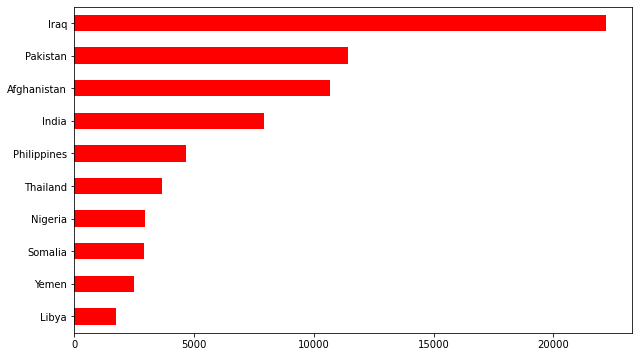

In [10]:
# The top 10 countries where terrorism occurs most frequently
country_top10 = df['countries'].value_counts(ascending=True).tail(10)
country_top10.plot(kind='barh',figsize=(10,6),color=(1,0,0))

<Figure size 800x480 with 0 Axes>

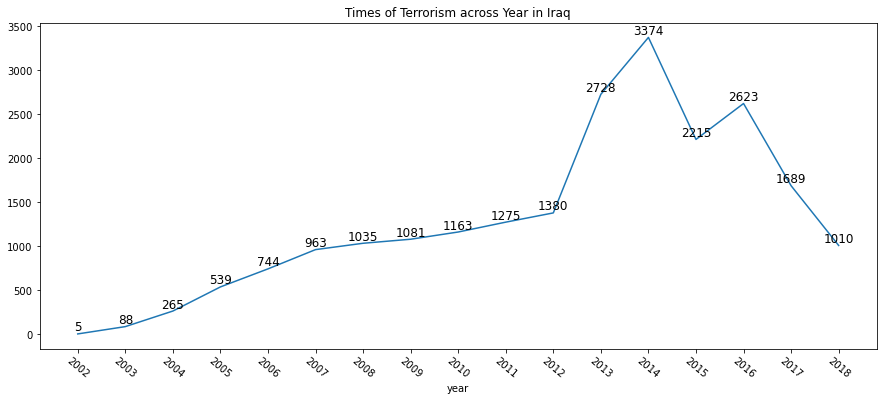

In [11]:
# count the times of Terrorism in Iraq by year and draw a figure
Iran_df = df[df['countries'] == 'Iraq'].groupby(by = 'year')[['countries']].count()
Iran_df = pd.DataFrame(Iran_df)
a3=["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
Iran_df['year'] =a3
Iran_df
fig = plt.figure(figsize=(10,6),dpi=80)
Iran_df[['year','countries']].plot(kind='line',
                                  x= 'year',
                                  y='countries',
                                  title='Times of Terrorism across Year in Iraq',
                                  legend=False,
                                  figsize=(15,6))
plt.xticks(range(17),( '2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018'))
plt.xticks(rotation=-40)
x=np.arange(0,17)
y=Iran_df.countries
for x,y in zip(x,y):
    plt.text(x,y+0.8,'%.0f'%y, ha='center', va='bottom', fontsize=12)

#plt.savefig("./t1.png")
plt.show()


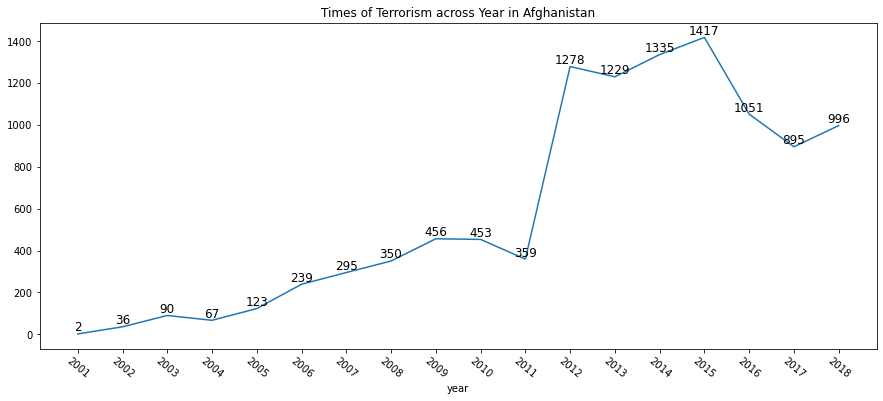

In [12]:
# count the times of Terrorism in Afghanistan by year and draw a figure
Iran_df = df[df['countries'] == 'Afghanistan'].groupby(by = 'year')[['countries']].count()
Iran_df = pd.DataFrame(Iran_df)
a3=['2001',"2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
Iran_df['year'] =a3
Iran_df

Iran_df[['year','countries']].plot(kind='line',
                                  x= 'year',
                                  y='countries',
                                  title='Times of Terrorism across Year in Afghanistan',
                                  figsize=(15,6),
                                  legend=False)
plt.xticks(range(18),( '2001','2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018'))
plt.xticks(rotation=-40)
x=np.arange(0,18)
y=Iran_df.countries
for x,y in zip(x,y):
    plt.text(x,y+0.8,'%.0f'%y, ha='center', va='bottom', fontsize=12)

plt.show()

<Figure size 800x480 with 0 Axes>

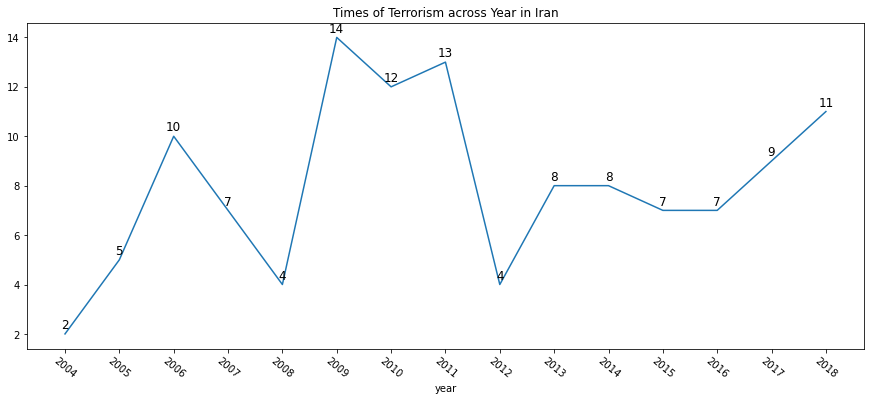

In [13]:
# count the times of Terrorism in Iran by year and draw a figure
Iran_df = df[df['countries'] == 'Iran'].groupby(by = 'year')[['countries']].count()
Iran_df = pd.DataFrame(Iran_df)
a3=["2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
Iran_df['year'] =a3
Iran_df
fig = plt.figure(figsize=(10,6),dpi=80)
Iran_df[['year','countries']].plot(kind='line',
                                  x= 'year',
                                  y='countries',
                                  title='Times of Terrorism across Year in Iran',
                                  legend=False,
                                  figsize=(15,6))
plt.xticks(range(15),( '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018'))
plt.xticks(rotation=-40)
x=np.arange(0,15)
y=Iran_df.countries
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=12)
#plt.savefig("./t1.png")
plt.show()

<Figure size 800x480 with 0 Axes>

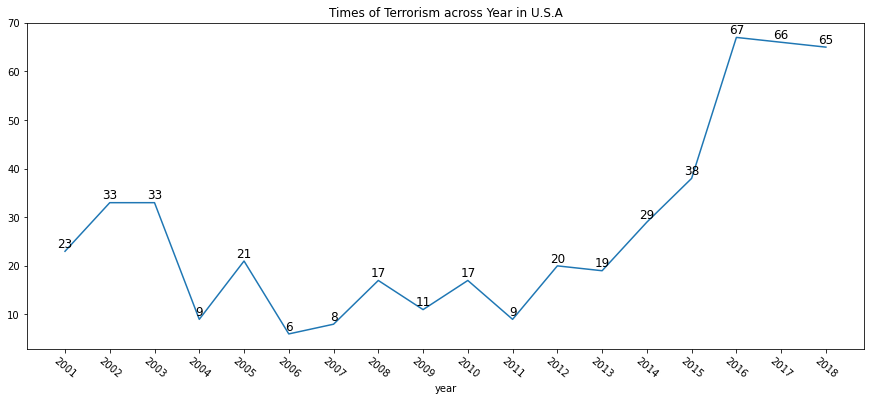

In [15]:
# count the times of Terrorism in USA by year and draw a figure
Iran_df = df[df['countries'] == 'United States'].groupby(by = 'year')[['countries']].count()
Iran_df = pd.DataFrame(Iran_df)
a3=['2001',"2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
Iran_df['year'] =a3
Iran_df
fig = plt.figure(figsize=(10,6),dpi=80)
Iran_df[['year','countries']].plot(kind='line',
                                  x= 'year',
                                  y='countries',
                                  title='Times of Terrorism across Year in U.S.A',
                                  legend=False,
                                  figsize=(15,6))
plt.xticks(range(18),( '2001','2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018'))
#plt.xlabel()
plt.xticks(rotation=-40)
x=np.arange(0,18)
y=Iran_df.countries
for x,y in zip(x,y):
    plt.text(x,y+0.2,'%.0f'%y, ha='center', va='bottom', fontsize=12)
#plt.savefig("./t1.png")
plt.show()

In [16]:
# count the times of Terrorism in Pakistan by year
dataPakistan = df[(df['countries'] == 'Pakistan')]
year_dataPakistan = dataPakistan.groupby(by = 'year')[['countries']].count()
year_dataPakistan

countries
year           
2001          7
2002         45
2003         28
2004         58
2005         75
2006        156
2007        228
2008        487
2009        599
2010        656
2011        937
2012       1513
2013       1973
2014       1888
2015       1053
2016        722
2017        590
2018        425

In [17]:
# count the times of Terrorism in India by year
dataIndia = df[(df['countries'] == 'India')]
year_dataIndia = dataIndia.groupby(by = 'year')[['countries']].count()
year_dataIndia

countries
year           
2001         49
2002        174
2003        182
2004         88
2005        135
2006        146
2007        137
2008        474
2009        587
2010        589
2011        559
2012        527
2013        613
2014        683
2015        657
2016        759
2017        804
2018        743

In [18]:
# count the times of Terrorism in Philippines by year
dataPhilippines = df[(df['countries'] == 'Philippines')]
year_dataPhilippines = dataPhilippines.groupby(by = 'year')[['countries']].count()
year_dataPhilippines

countries
year           
2001         12
2002         46
2003         92
2004         29
2005         20
2006         53
2007         62
2008        237
2009        209
2010        198
2011        139
2012        227
2013        591
2014        506
2015        635
2016        547
2017        575
2018        501

In [19]:
#count the times of Terrorism in Somalia by year
Somalia = df[(df['countries'] == 'Somalia')]
year_Somalia = Somalia.groupby(by = 'year')[['countries']].count()
year_Somalia

countries
year           
2002          3
2004          1
2005          6
2006          7
2007        126
2008        147
2009         89
2010         92
2011        115
2012        229
2013        219
2014        446
2015        266
2016        414
2017        420
2018        324

In [20]:
#count the times of Terrorism in Nigeria by year
Nigeria = df[(df['countries'] == 'Nigeria')]
year_Nigeria = Nigeria.groupby(by = 'year')[['countries']].count()
year_Nigeria

countries
year           
2001          2
2002          6
2003          7
2004          5
2005          4
2006         26
2007         44
2008         53
2009         29
2010         54
2011        161
2012        527
2013        244
2014        365
2015        360
2016        365
2017        336
2018        370

In [21]:
#count the times of Terrorism in Thailand by year
Thailand = df[(df['countries'] == 'Thailand')]
year_Thailand = Thailand.groupby(by = 'year')[['countries']].count()
year_Thailand

countries
year           
2001          5
2002         12
2003          6
2004         42
2005        154
2006        197
2007        281
2008        191
2009        294
2010        252
2011        177
2012        273
2013        458
2014        410
2015        265
2016        313
2017        168
2018        171

In [22]:
#count the times of Terrorism in Yemen by year
Yemen = df[(df['countries'] == 'Yemen')]
year_Yemen = Yemen.groupby(by = 'year')[['countries']].count()
year_Yemen

countries
year           
2001          1
2002          6
2003          7
2005          5
2006          4
2007          5
2008         21
2009         14
2010         94
2011         90
2012        287
2013        327
2014        535
2015        399
2016        358
2017        150
2018        202

In [23]:
#count the times of Terrorism in Libya by year
Libya = df[(df['countries'] == 'Libya')]
year_Libya = Libya.groupby(by = 'year')[['countries']].count()
year_Libya

countries
year           
2007          1
2008          1
2011          2
2012         53
2013        267
2014        550
2015        369
2016        247
2017        129
2018        124

# Stat by fatalities&injured

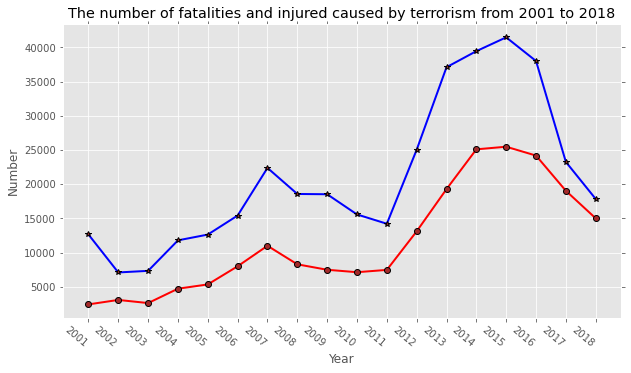

In [24]:
df_fatalities = df.groupby(by = 'year')[['fatalities']].sum()
df_injured = df.groupby(by = 'year')[['injured']].sum()
# design style
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))

plt.plot(
         df_fatalities, # data
         linestyle = '-', 
         linewidth = 2, 
         color = 'red', # red for fatalities
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown') 
plt.plot(
         df_injured, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'blue', # blue for injured
         marker = '*',
         markersize = 6, 
         markeredgecolor='black',
         markerfacecolor='brown') 
# add title and labels
plt.title('The number of fatalities and injured caused by terrorism from 2001 to 2018')
plt.xlabel('Year')
plt.ylabel('Number')

# Eliminate the ticks on the top and right 
plt.tick_params(top = 'off', right = 'off')

fig.autofmt_xdate(rotation = -40)  

plt.show()

In [25]:
#average fatalities number and injured number for different countries.
Coun_df = df.groupby('countries').mean()
Coun_dfnew = Coun_df.reset_index()
Coun_dfnew

countries  fatalities    injured
0       Afghanistan    3.326773   4.277106
1           Albania    0.100000   0.200000
2           Algeria    2.297160   2.814402
3            Angola    7.583333  40.333333
4         Argentina    0.000000   0.307692
..              ...         ...        ...
161  Western Sahara    0.000000   1.500000
162           Yemen    2.483433   3.504591
163      Yugoslavia    0.000000   0.000000
164          Zambia    0.000000   0.000000
165        Zimbabwe    0.750000   4.958333

[166 rows x 3 columns]

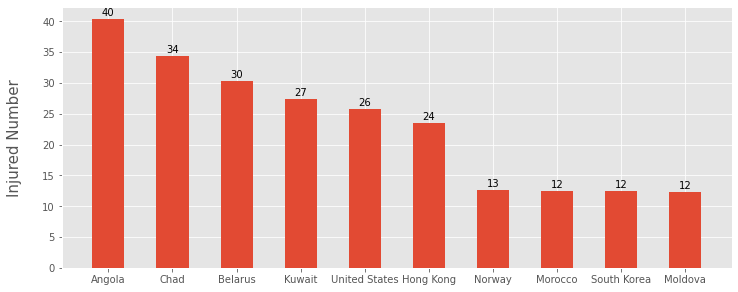

In [26]:
#Top ten Countries with the Highest Average Number of Injuries in Terrorist Incidents
Coun_dfnew1=Coun_dfnew.sort_values(by=["injured"],ascending = False ).head(10)
plt.figure(figsize=(12,4.8))
plt.bar(x = Coun_dfnew1.countries,height = Coun_dfnew1.injured,width=0.5)
x=np.arange(0,10)
y=Coun_dfnew1.injured
plt.ylabel('Injured Number',fontsize=15,labelpad=20)
#plt.title('Ten countries with the highest average number of injuries in terrorist incidents',fontsize=15)
for x,y in zip(x,y):
    plt.text(x,y+0.2,'%.0f'%y, ha='center', va='bottom', fontsize=10)
plt.savefig("./t3.png")
plt.show()

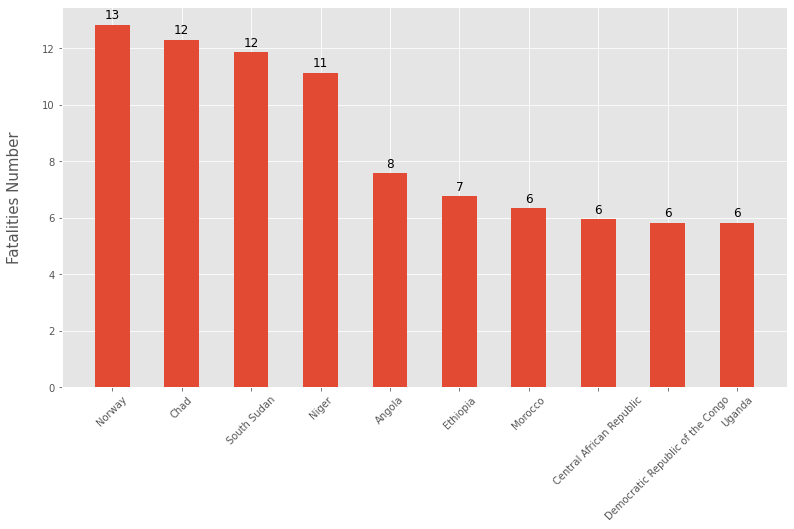

In [27]:
#Top ten Countries with the Highest Average Number of fatalities in Terrorist Incidents
Coun_dfnew2=Coun_dfnew.sort_values(by=["fatalities"],ascending = False ).head(10)
plt.figure(figsize=(13,7))
plt.bar(x = Coun_dfnew2.countries,height = Coun_dfnew2.fatalities,width=0.5)
x=np.arange(0,10)
y=Coun_dfnew2.fatalities
plt.ylabel('Fatalities Number',fontsize=15,labelpad=20)
#plt.title('xxxx',fontsize=12)
plt.xticks(rotation=45)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=12)
plt.savefig("./t4.png")
plt.show()

# Stat by target types

In [28]:
# average fatalities number and injured number for different target types.
TT_df = df.groupby('target_types').mean()
TT_dfnew = TT_df.reset_index()
TT_dfnew

target_types  fatalities     injured
0                                     Abortion Related    0.153846    0.346154
1                                Airports and Aircraft    3.285714    1.428571
2    Airports and Aircraft,Airports and Aircraft,Ai...   38.000000  168.000000
3        Airports and Aircraft,Educational Institution    0.000000    0.000000
4        Airports and Aircraft,Government (Diplomatic)    0.500000    2.500000
..                                                 ...         ...         ...
530                     Violent Political Party,Police    2.250000    8.250000
531  Violent Political Party,Private Citizens & Pro...    5.333333   24.444444
532  Violent Political Party,Religious Figures/Inst...    8.000000   33.000000
533    Violent Political Party,Violent Political Party    0.285714    2.428571
534  Violent Political Party,Violent Political Part...    1.500000    7.000000

[535 rows x 3 columns]

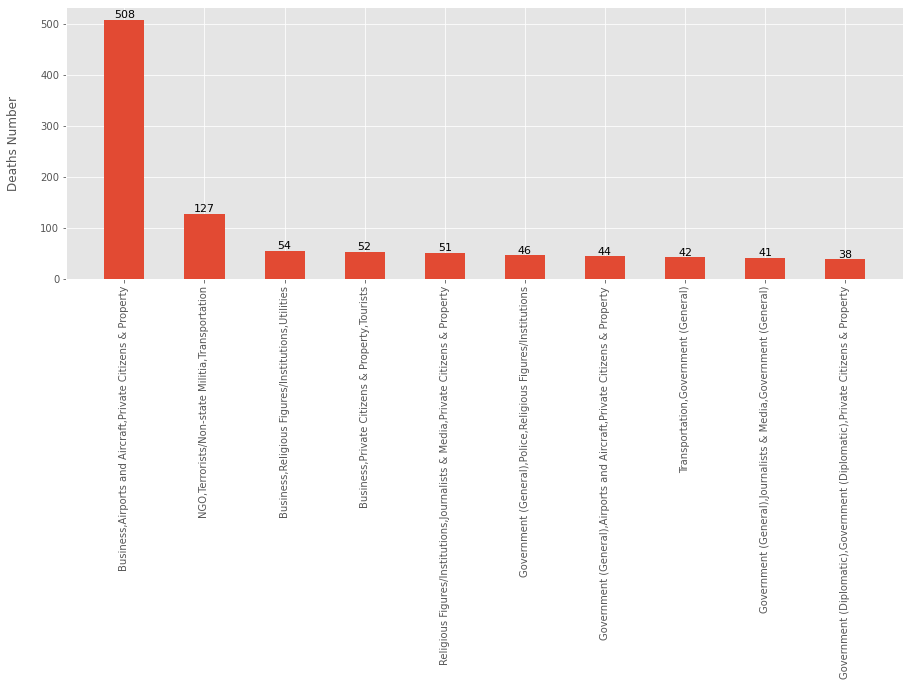

In [29]:
#Top ten target types with the Highest Average Number of fatalities in Terrorist Incidents
#Because the name of the weapon is so long,we decided to use excel to draw a bar chart.
TT_dfnew1=TT_dfnew.sort_values(by=["fatalities"],ascending = False ).head(10)
plt.figure(figsize=(15,5))
plt.bar(x = TT_dfnew1.target_types,height = TT_dfnew1.fatalities,width=0.5)
x=np.arange(0,10)
y=TT_dfnew1.fatalities
plt.ylabel('Deaths Number',fontsize=12,labelpad=20)
#plt.title('xxxx',fontsize=12)
plt.xticks(rotation=90)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=11)
plt.show()

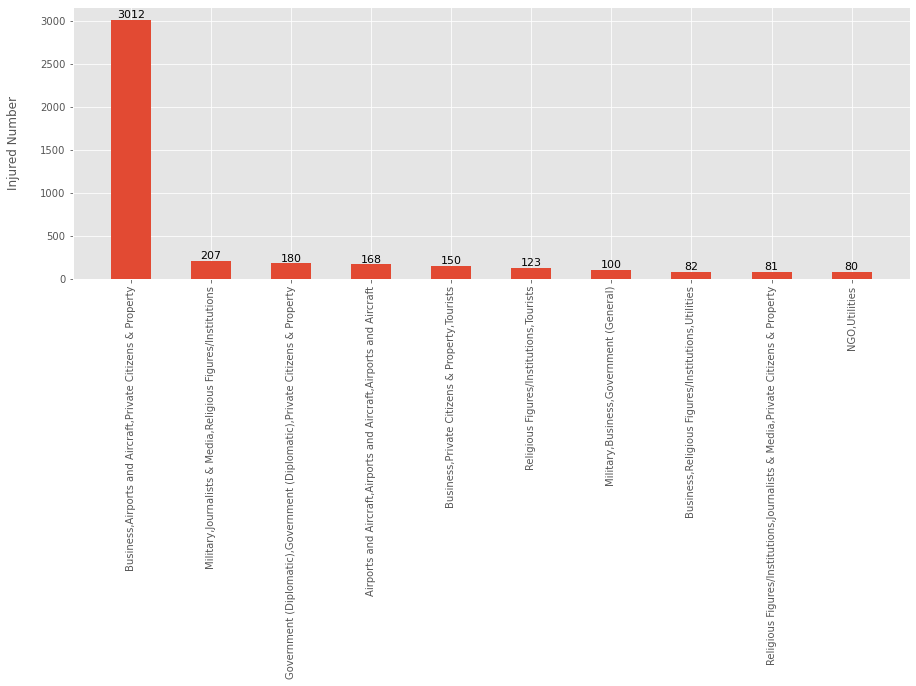

In [30]:
#Top ten target types with the Highest Average Number of injured in Terrorist Incidents
#Because the name of the weapon is so long,we decided to use excel to draw a bar chart.
TT_dfnew2=TT_dfnew.sort_values(by=["injured"],ascending = False ).head(10)
plt.figure(figsize=(15,5))
plt.bar(x = TT_dfnew2.target_types,height = TT_dfnew2.injured,width=0.5)
x=np.arange(0,10)
y=TT_dfnew2.injured
plt.ylabel('Injured Number',fontsize=12,labelpad=20)
#plt.title('xxxx',fontsize=12)
plt.xticks(rotation=90)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=11)
plt.show()

In [31]:
# Top ten target types with most times of terrorism.
TTcoun_df = df.groupby('target_types')[['countries']].count()
TTcoun_dfnew=TTcoun_df.sort_values(by=["countries"],ascending = False ).head(10)
TTcoun_dfnew2=TTcoun_dfnew.reset_index()
TTcoun_dfnew2

target_types  countries
0     Private Citizens & Property      25912
1                          Police      13382
2                        Military      13271
3            Government (General)      10260
4                        Business       7775
5                  Transportation       2732
6  Religious Figures/Institutions       2706
7         Educational Institution       2672
8                       Utilities       2209
9    Terrorists/Non-state Militia       1761

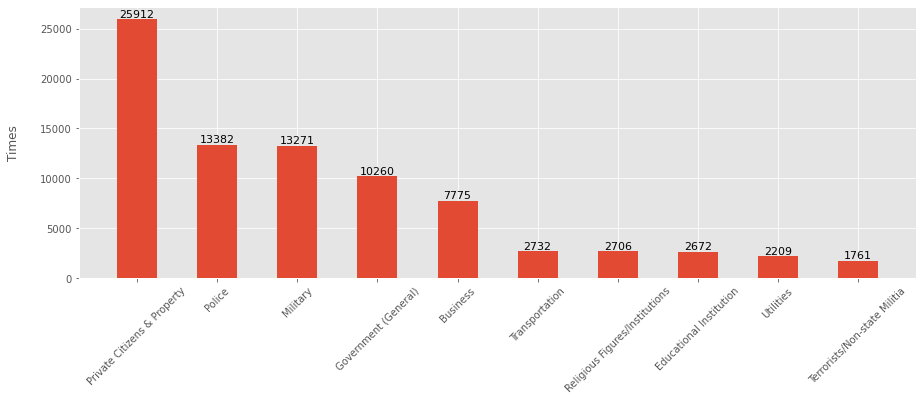

In [32]:
plt.figure(figsize=(15,5))
plt.bar(x = TTcoun_dfnew2.target_types,height = TTcoun_dfnew2.countries,width=0.5)
x=np.arange(0,10)
y=TTcoun_dfnew2.countries
plt.ylabel('Times',fontsize=12,labelpad=20)
#plt.title('xxxx',fontsize=12)
plt.xticks(rotation=45)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=11)
plt.show()

# Stat by weapon types

In [33]:
# average fatalities number and injured number for different weapon types.
WT_df = df.groupby('weapon_types').mean()
WT_dfnew = WT_df.reset_index()
WT_dfnew

weapon_types  fatalities  \
0                                           Biological    0.304348   
1                                             Chemical    1.043478   
2                                  Chemical,Biological    0.000000   
3                                       Chemical,Other    0.000000   
4                            Explosives/Bombs/Dynamite    1.938712   
..                                                 ...         ...   
147  Vehicle (not to include vehicle-borne explosiv...    0.946903   
148  Vehicle (not to include vehicle-borne explosiv...    8.000000   
149  Vehicle (not to include vehicle-borne explosiv...    0.000000   
150  Vehicle (not to include vehicle-borne explosiv...  714.500000   
151  Vehicle (not to include vehicle-borne explosiv...    8.000000   

         injured  
0       1.173913  
1      37.255435  
2       1.000000  
3      20.000000  
4       5.201192  
..           ...  
147     4.690265  
148    13.000000  
149     0.000000  
150  5443.500000  
151    22.000000  

[152 rows x 3 columns]

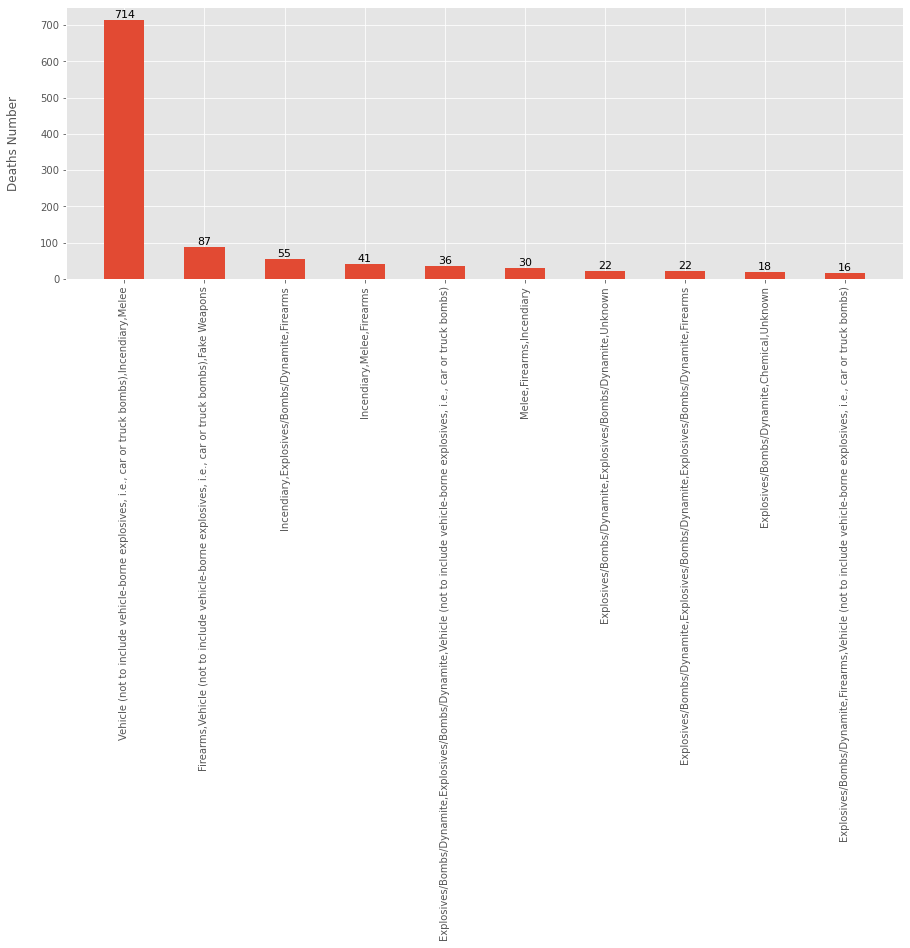

In [34]:
#Top ten weapon types with the Highest Average Number of fatalities in Terrorist Incidents
#Because the name of the weapon is so long,we decided to use excel to draw a bar chart.
WT_dfnew1=WT_dfnew.sort_values(by=["fatalities"],ascending = False ).head(10)
plt.figure(figsize=(15,5))
plt.bar(x = WT_dfnew1.weapon_types,height = WT_dfnew1.fatalities,width=0.5)
x=np.arange(0,10)
y=WT_dfnew1.fatalities
plt.ylabel('Deaths Number',fontsize=12,labelpad=20)
#plt.title('xxxx',fontsize=12)
plt.xticks(rotation=90)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=11)
plt.show()

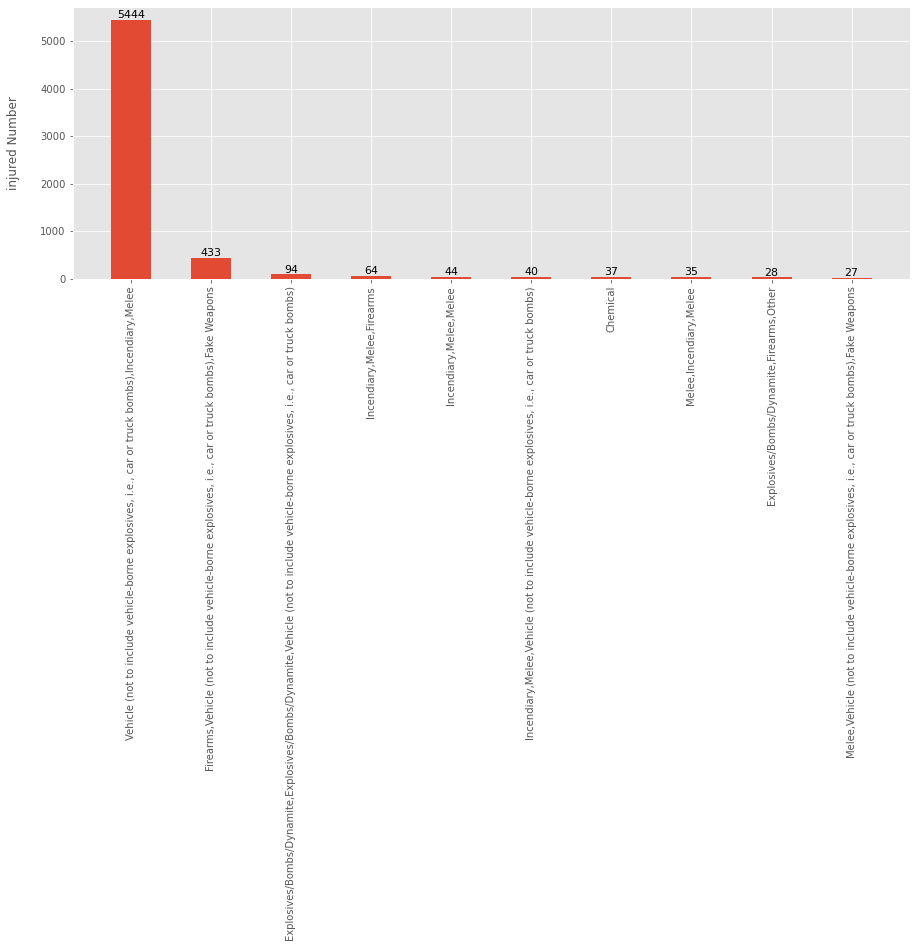

In [35]:
#Top ten weapon types with the Highest Average Number of injured in Terrorist Incidents
#Because the name of the weapon is so long,we decided to use excel to draw a bar chart.
WT_dfnew2=WT_dfnew.sort_values(by=["injured"],ascending = False ).head(10)
plt.figure(figsize=(15,5))
plt.bar(x = WT_dfnew2.weapon_types,height = WT_dfnew2.injured,width=0.5)
x=np.arange(0,10)
y=WT_dfnew2.injured
plt.ylabel('injured Number',fontsize=12,labelpad=20)
#plt.title('xxxx',fontsize=12)
plt.xticks(rotation=90)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%.0f'%y, ha='center', va='bottom', fontsize=11)
plt.show()

In [38]:
# Top ten weapon types with most times of terrorism.
#Because the name of the weapon is so long,we decided to use excel to draw a bar chart.
WT_df = df.groupby('weapon_types')[['countries']].count()
WT_df.sort_values(by=["countries"],ascending = False ).head(10)

countries
weapon_types                                                 
Explosives/Bombs/Dynamite                               52343
Firearms                                                28679
Incendiary                                               4786
Explosives/Bombs/Dynamite,Firearms                       3068
Melee                                                    1856
Firearms,Incendiary                                      1150
Firearms,Melee                                            657
Explosives/Bombs/Dynamite,Explosives/Bombs/Dyna...        477
Explosives/Bombs/Dynamite,Explosives/Bombs/Dyna...        409
Explosives/Bombs/Dynamite,Unknown                         286